In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
import statistics as stats
import statsmodels.api as sm
import researchpy as rp

In [2]:
#opening data
#data=pd.read_csv('student-por preprocessed def.csv', sep=';')
data=pd.read_csv('student-por.csv', sep=';')
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


/Applications/anaconda/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Applications/anaconda/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Applications/anaconda/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misi

Text(0, 0.5, 'number of students')

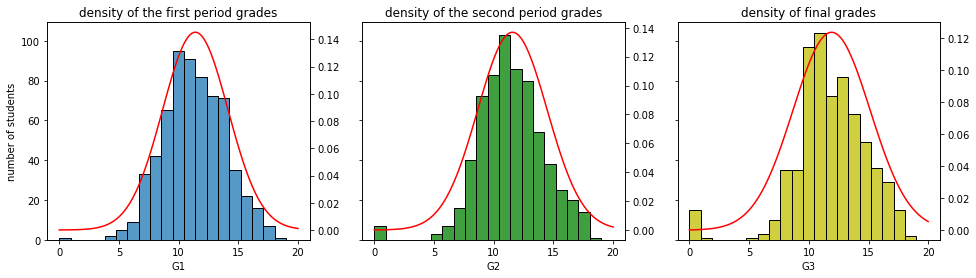

In [3]:
#study if the distribution of grades is normal: plot of density


#creating subplot all sharing the same axes
fig, axes=plt.subplots(1, 3, sharex=True, sharey=True, figsize=(16,4))

#subplot of the first period grades
sns.histplot(data, x='G1', bins=20, log_scale=(False,False), ax=axes[0]) 
axes[0].set_title('density of the first period grades')

#plot of gaussian distribution to compare
mu1=data['G1'].mean()
sigma1=stats.stdev(data['G1'])
x = np.linspace(0, 20, 100)
ax = axes[0].twinx()
sns.lineplot(x, st.norm.pdf(x, mu1, sigma1), color='r', ax=ax)

#subplot of the second period grades
sns.histplot(data,x='G2', bins=20, log_scale=(False,False),ax=axes[1],color='g')
axes[1].set_title('density of the second period grades')

#plot of gaussian distribution to compare
mu2=data['G2'].mean()
sigma2=stats.stdev(data['G2'])
ax = axes[1].twinx()
sns.lineplot(x, st.norm.pdf(x, mu2, sigma2), color='r', ax=ax)

#subplot of final grades
sns.histplot(data,x='G3', bins=20, log_scale=(False,False),ax=axes[2],color='y')
axes[2].set_title('density of final grades')

#plot of gaussian distribution to compare
mu3=data['G3'].mean()
sigma3=stats.stdev(data['G3'])
ax = axes[2].twinx()
sns.lineplot(x, st.norm.pdf(x, mu3, sigma3), color='r', ax=ax)

#set name of y 
axes[0].set_ylabel('number of students')

#the three densities seem to fit the gaussian distribution but not so well now we are going to try to see if there 
#is evidence to think that they are actually normal

<AxesSubplot:>

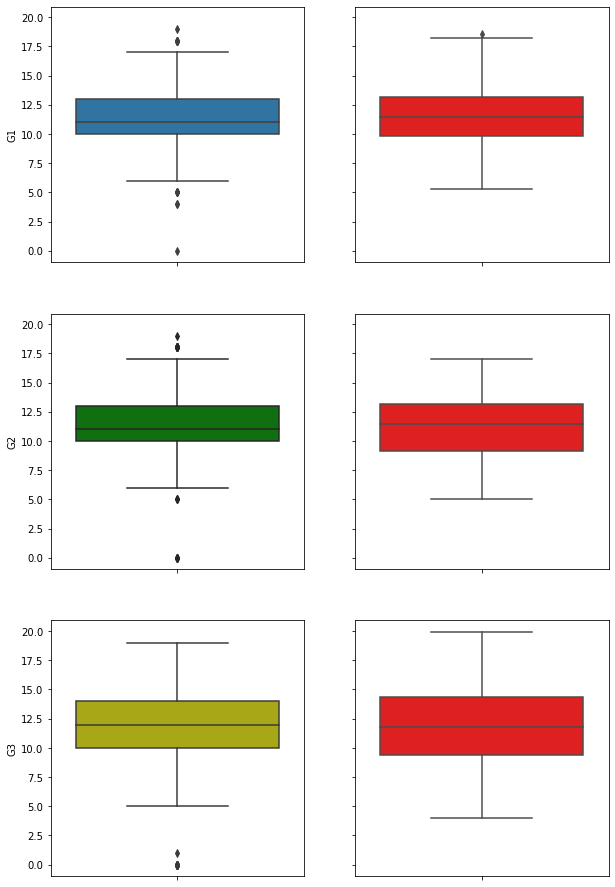

In [4]:
#another tecnique to check if data are actually normal distributed
#creating new subplots
fig, axes=plt.subplots(3, 2, sharex=True, sharey=True, figsize=(10,16))

#boxplot of G1
sns.boxplot(y=data['G1'], ax=axes[0,0]) 

#boxplot of normal data with mean and standard deviation of G1
sns.boxplot( y=st.norm.rvs(size=100, loc=mu1, scale=sigma1), color='r', ax=axes[0,1])

#boxplot of G2
sns.boxplot(y=data['G2'], ax=axes[1,0], color='g')

#boxplot of normal data with mean and standard deviation of G2
sns.boxplot( y=st.norm.rvs(size=100, loc=mu2, scale=sigma2), color='r', ax=axes[1,1])

#boxplot of G2
sns.boxplot(y=data['G3'], ax=axes[2,0], color='y')

#boxplot of normal data with mean and standard deviation of G3
sns.boxplot( y=st.norm.rvs(size=100, loc=mu3, scale=sigma3), color='r', ax=axes[2,1])


ShapiroResult(statistic=0.9616650342941284, pvalue=5.578248800375274e-12)
ShapiroResult(statistic=0.9855359792709351, pvalue=4.922839707433013e-06)
ShapiroResult(statistic=0.9259759783744812, pvalue=2.4126299171356578e-17)


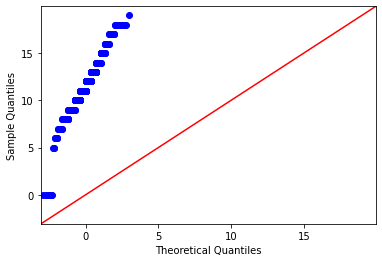

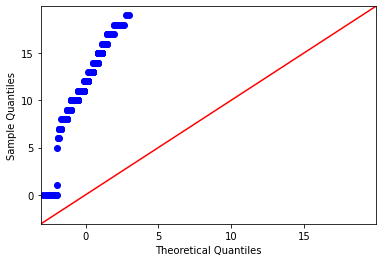

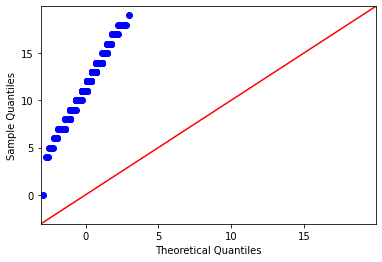

In [5]:
#try to prove the normality of datas with more specific tecniques
sm.qqplot(data['G2'], line='45')
sm.qqplot(data['G3'], line='45')
sm.qqplot(data['G1'], line='45')
print(st.shapiro(data['G2']))
print(st.shapiro(data['G1']))
print(st.shapiro(data['G3']))

#as we can observe our data are not actually normal because the qqplot shows perfectly that our data are far away from
#the red line (line of theoretical quantiles). in addition also the shapiro test has a p value very small, which
#suggest to refuse the null hypothesis (distribution is normal)



In [6]:
#we observe from the boxplot that the outliers are those values <5
print(st.shapiro(data['G3'][data['G3']>=5]))
#the p value is still too small to believe that our distribution is normal 

ShapiroResult(statistic=0.9758786559104919, pvalue=1.0525653237891675e-08)


In [7]:
#is there a significant difference between boys and girls?
#to answer we apply some hypothesis test on the differences between girls' mean and boys' mean


In [8]:
#t test on G1 
summary, results = rp.ttest(group1= data['G1'][data['sex'] == 'M'], group1_name= "Male",
         group2= data['G1'][data['sex'] == 'F'], group2_name= "Female", equal_variances= False)
print(summary)
print(results)
#we notice that both 'two side test' and 'difference <0 test' has a small p value (even minor than 0.01) so we can
#conclude that in the first period girls were better than boys

   Variable      N       Mean        SD        SE  95% Conf.   Interval
0      Male  266.0  11.056391  2.640865  0.161922  10.737574  11.375208
1    Female  383.0  11.637076  2.794232  0.142779  11.356345  11.917806
2  combined  649.0  11.399076  2.745265  0.107761  11.187472  11.610679
                  Welch's t-test   results
0  Difference (Male - Female) =    -0.5807
1          Degrees of freedom =   591.9478
2                           t =    -2.6898
3       Two side test p value =     0.0074
4      Difference < 0 p value =     0.0037
5      Difference > 0 p value =     0.9963
6                   Cohen's d =    -0.2125
7                   Hedge's g =    -0.2123
8               Glass's delta =    -0.2199
9                 Pearson's r =     0.1099


In [9]:
#t test on G2
summary, results = rp.ttest(group1= data['G2'][data['sex'] == 'M'], group1_name= "Male",
         group2= data['G2'][data['sex'] == 'F'], group2_name= "Female", equal_variances= False)
print(summary)
print(results)
#again both the tests has p value really small evidence that girls' grades kept bigger than boys' 
#(the difference between the means is even bigger)

   Variable      N       Mean        SD        SE  95% Conf.   Interval
0      Male  266.0  11.206767  2.800019  0.171680  10.868736  11.544798
1    Female  383.0  11.822454  2.967506  0.151632  11.524316  12.120593
2  combined  649.0  11.570108  2.913639  0.114370  11.345527  11.794689
                  Welch's t-test   results
0  Difference (Male - Female) =    -0.6157
1          Degrees of freedom =   592.4999
2                           t =    -2.6879
3       Two side test p value =     0.0074
4      Difference < 0 p value =     0.0037
5      Difference > 0 p value =     0.9963
6                   Cohen's d =    -0.2123
7                   Hedge's g =    -0.2121
8               Glass's delta =    -0.2199
9                 Pearson's r =     0.1098


In [10]:
#t test on final grades
summary, results = rp.ttest(group1= data['G3'][data['sex'] == 'M'], group1_name= "Male",
         group2= data['G3'][data['sex'] == 'F'], group2_name= "Female", equal_variances= False)
print(summary)
print(results)
#here again we have the same results as before, but p values here are smaller which makes also believe that 
#girls tend to improve their grades more that boys do even if looking at the averages both girls and boys 
#have improved their grades

#from this analysis we assume that girls have better grades 

   Variable      N       Mean        SD        SE  95% Conf.   Interval
0      Male  266.0  11.406015  3.320690  0.203605  11.005127  11.806904
1    Female  383.0  12.253264  3.124147  0.159636  11.939388  12.567140
2  combined  649.0  11.906009  3.230656  0.126814  11.656993  12.155026
                  Welch's t-test   results
0  Difference (Male - Female) =    -0.8472
1          Degrees of freedom =   549.3077
2                           t =    -3.2747
3       Two side test p value =     0.0011
4      Difference < 0 p value =     0.0006
5      Difference > 0 p value =     0.9994
6                   Cohen's d =    -0.2643
7                   Hedge's g =    -0.2640
8               Glass's delta =    -0.2551
9                 Pearson's r =     0.1384


In [11]:
#but why is there this difference between girls and boys? Is it due to the greater number of hours that girls spend
#studying?

#t test on difference of study time between girls and boys
summary, results = rp.ttest(group1= data['studytime'][data['sex'] == 'M'], group1_name= "Male",
         group2= data['studytime'][data['sex'] == 'F'], group2_name= "Female", equal_variances= False)
print(summary)
print(results)

#according to this test it is true that girls study much more than boys considering that this dataset doesn't give the 
#study time hours. it devides the study time in zones from 1 to 5 and being in the third zone for example means that 
#a person spend more than 5 hours studying


   Variable      N      Mean        SD        SE  95% Conf.  Interval
0      Male  266.0  1.725564  0.826372  0.050668   1.625801  1.825327
1    Female  383.0  2.073107  0.802406  0.041001   1.992491  2.153723
2  combined  649.0  1.930663  0.829510  0.032561   1.866725  1.994601
                  Welch's t-test   results
0  Difference (Male - Female) =    -0.3475
1          Degrees of freedom =   561.2352
2                           t =    -5.3321
3       Two side test p value =     0.0000
4      Difference < 0 p value =     0.0000
5      Difference > 0 p value =     1.0000
6                   Cohen's d =    -0.4278
7                   Hedge's g =    -0.4274
8               Glass's delta =    -0.4206
9                 Pearson's r =     0.2196


In [12]:
#from previous analysis it appears that the more people spend time study, the higher their grades are
#but is it actually true? 

#this time I'll compare only final grades because I suppose that the study time will make grades increase only after 
#few time from the biginning of the academic year

summary, results = rp.ttest(group1= data['G3'][data['studytime'] <= 2], group1_name= "less",
         group2= data['G3'][data['studytime'] >= 3], group2_name= "more", equal_variances= False)
print(summary)
print(results)

#it is absolutely true that people who study more than ten hours have better grades than people who study less than 
#two hour, but it's not obviously enough to assert that our hypothesis is true
#

   Variable      N       Mean        SD        SE  95% Conf.   Interval
0      less  517.0  11.580271  3.287844  0.144599  11.296195  11.864346
1      more  132.0  13.181818  2.643783  0.230112  12.726602  13.637034
2  combined  649.0  11.906009  3.230656  0.126814  11.656993  12.155026
                Welch's t-test   results
0  Difference (less - more) =    -1.6015
1        Degrees of freedom =   246.8121
2                         t =    -5.8930
3     Two side test p value =     0.0000
4    Difference < 0 p value =     0.0000
5    Difference > 0 p value =     1.0000
6                 Cohen's d =    -0.5055
7                 Hedge's g =    -0.5049
8             Glass's delta =    -0.4871
9               Pearson's r =     0.3512


In [13]:
#now we compare people who study more than 10 hours with people who study between 5 and 10 hours
summary, results = rp.ttest(group1= data['G3'][data['studytime'] == 3], group1_name= "less",
         group2= data['G3'][data['studytime'] == 4], group2_name= "more", equal_variances= False)
print(summary)
print(results)

#as we can observe here the two groups have the same grades' mean (in fact all the p values are very big and we always 
#accept H0 which means in the first test diff=0 while in the others diff>=0 and diff<=0 respectively) people who study less
#even have better grades. as a consequence our assumption was wrong 
#

   Variable      N       Mean        SD        SE  95% Conf.   Interval
0      less   97.0  13.226804  2.502104  0.254050  12.722519  13.731090
1      more   35.0  13.057143  3.038410  0.513585  12.013413  14.100873
2  combined  132.0  13.181818  2.643783  0.230112  12.726602  13.637034
                Welch's t-test  results
0  Difference (less - more) =    0.1697
1        Degrees of freedom =   52.5727
2                         t =    0.2961
3     Two side test p value =    0.7683
4    Difference < 0 p value =    0.6158
5    Difference > 0 p value =    0.3842
6                 Cohen's d =    0.0640
7                 Hedge's g =    0.0636
8             Glass's delta =    0.0678
9               Pearson's r =    0.0408


In [14]:
#we now want to see how does the family impact on the final grade of students

In [15]:
#t test to see if people with parents divorced have worst grades than others
summary, results = rp.ttest(group1= data['G3'][data['Pstatus'] == "A"], group1_name= "alone",
         group2= data['G3'][data['Pstatus'] == "T"], group2_name= "more", equal_variances= False)
print(summary)
print(results)

#due to the risults we do not have evidence to support the previous hypothesis in fact the
#the averages are almost the same

   Variable      N       Mean        SD        SE  95% Conf.   Interval
0     alone   80.0  11.912500  3.222523  0.360289  11.195363  12.629637
1      more  569.0  11.905097  3.234626  0.135603  11.638753  12.171440
2  combined  649.0  11.906009  3.230656  0.126814  11.656993  12.155026
                 Welch's t-test   results
0  Difference (alone - more) =     0.0074
1         Degrees of freedom =   103.2734
2                          t =     0.0192
3      Two side test p value =     0.9847
4     Difference < 0 p value =     0.5077
5     Difference > 0 p value =     0.4923
6                  Cohen's d =     0.0023
7                  Hedge's g =     0.0023
8              Glass's delta =     0.0023
9                Pearson's r =     0.0019


In [16]:
#t test to see if there is difference between big or small families
summary, results = rp.ttest(group1= data['G3'][data['famsize'] == "LE3"], group1_name= "small",
         group2= data['G3'][data['famsize'] == "GT3"], group2_name= "big", equal_variances= False)
print(summary)
print(results)

#apparently the dimention of families doesn't impact on the grades of students (neither in G1 and G2 cases)

   Variable      N       Mean        SD        SE  95% Conf.   Interval
0     small  192.0  12.130208  2.919285  0.210681  11.714648  12.545769
1       big  457.0  11.811816  3.351426  0.156773  11.503729  12.119903
2  combined  649.0  11.906009  3.230656  0.126814  11.656993  12.155026
                Welch's t-test   results
0  Difference (small - big) =     0.3184
1        Degrees of freedom =   410.6020
2                         t =     1.2124
3     Two side test p value =     0.2261
4    Difference < 0 p value =     0.8870
5    Difference > 0 p value =     0.1130
6                 Cohen's d =     0.0986
7                 Hedge's g =     0.0985
8             Glass's delta =     0.1091
9               Pearson's r =     0.0597


In [17]:
#t test to test if the quality of relationships inside the family impact on students' grades 
summary, results = rp.ttest(group1= data['G3'][data['famrel'] == 1], group1_name= "bad",
         group2= data['G3'][data['famrel'] == 5], group2_name= "excellent", equal_variances= False)
print(summary)
print(results)

#this test make clear that there's not evidence to think that quality of family relationships have a 
#relevant impact on students' grades (also in G1 and G2)

    Variable      N       Mean        SD        SE  95% Conf.   Interval
0        bad   22.0  10.636364  3.645551  0.777234   9.020017  12.252710
1  excellent  180.0  11.633333  3.584417  0.267167  11.106132  12.160535
2   combined  202.0  11.524752  3.595448  0.252975  11.025927  12.023577
                    Welch's t-test  results
0  Difference (bad - excellent) =   -0.9970
1            Degrees of freedom =   26.7054
2                             t =   -1.2130
3         Two side test p value =    0.2359
4        Difference < 0 p value =    0.1179
5        Difference > 0 p value =    0.8821
6                     Cohen's d =   -0.2776
7                     Hedge's g =   -0.2766
8                 Glass's delta =   -0.2735
9                   Pearson's r =    0.2285


In [18]:
#we now try to see if there is evidence to think that only child with separated parents have worse grades than
#children with parents who live together
summary, results = rp.ttest(group1= data['G3'][data['famsize'] == "LE3"][data['Pstatus']=='A'], group1_name= "small",
         group2= data['G3'][data['famsize'] == "LE3"][data['Pstatus']=='T'], group2_name= "big", equal_variances= False)
print(summary)
print(results)

#again we have no evidence to think that the hypothesis above is true

   Variable      N       Mean        SD        SE  95% Conf.   Interval
0     small   47.0  12.042553  3.182544  0.464222  11.108123  12.976983
1       big  145.0  12.158621  2.839884  0.235840  11.692466  12.624775
2  combined  192.0  12.130208  2.919285  0.210681  11.714648  12.545769
                Welch's t-test  results
0  Difference (small - big) =   -0.1161
1        Degrees of freedom =   72.3465
2                         t =   -0.2229
3     Two side test p value =    0.8242
4    Difference < 0 p value =    0.4121
5    Difference > 0 p value =    0.5879
6                 Cohen's d =   -0.0397
7                 Hedge's g =   -0.0395
8             Glass's delta =   -0.0365
9               Pearson's r =    0.0262


In [19]:
#as a consequence of these results, according to this dataset we have no evidence to believe that
#family's relations (between parents or children) and dimentions have a relevant impact on students' grades

In [20]:
#test linear correlation between the final grades with the previos
print(st.pearsonr(data['G2'],data['G3']))
print(st.pearsonr(data['G1'],data['G3']))

(0.9185480035603508, 5.6424014895891085e-263)
(0.8263871247890472, 1.6175710073501345e-163)


Text(0.5, 1.0, 'correlation between second period grades and final grades')

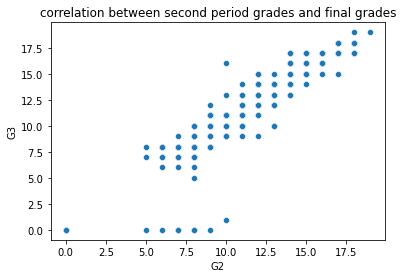

In [21]:
#also graphically
sns.scatterplot(x=data['G2'],y=data['G3'])
plt.title('correlation between second period grades and final grades')

Text(0.5, 1.0, 'correlation between first period grades and final grades')

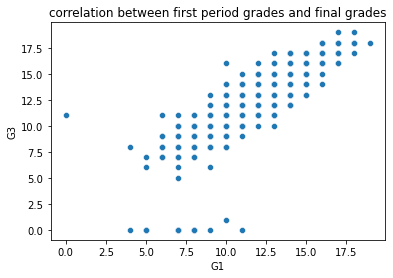

In [22]:
sns.scatterplot(x=data['G1'],y=data['G3'])
plt.title('correlation between first period grades and final grades')

Text(0.5, 1.0, 'correlation between first period grades and second period grades')

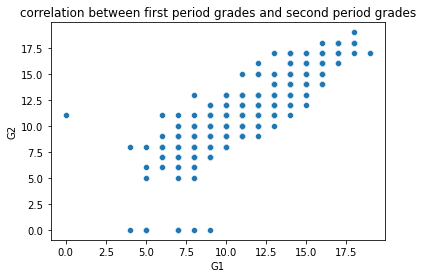

In [23]:
#also wants to see whether G1 and G2 are correlated
sns.scatterplot(x=data['G1'],y=data['G2'])
plt.title('correlation between first period grades and second period grades')

In [24]:
#applying hypothesis tests to confirm the previous results
summary, results = rp.ttest(group1= data['G3'][data['G2'] <=10], group1_name= "small",
         group2= data['G3'][data['G2'] >10], group2_name= "big", equal_variances= False)
print(summary)
print(results)

   Variable      N       Mean        SD        SE  95% Conf.   Interval
0     small  228.0   8.890351  2.760849  0.182842   8.530067   9.250635
1       big  421.0  13.539192  2.091140  0.101916  13.338864  13.739521
2  combined  649.0  11.906009  3.230656  0.126814  11.656993  12.155026
                Welch's t-test   results
0  Difference (small - big) =    -4.6488
1        Degrees of freedom =   371.8218
2                         t =   -22.2085
3     Two side test p value =     0.0000
4    Difference < 0 p value =     0.0000
5    Difference > 0 p value =     1.0000
6                 Cohen's d =    -1.9799
7                 Hedge's g =    -1.9777
8             Glass's delta =    -1.6838
9               Pearson's r =     0.7551


In [25]:
summary, results = rp.ttest(group1= data['G3'][data['G1'] <=10], group1_name= "small",
         group2= data['G3'][data['G1'] >10], group2_name= "big", equal_variances= False)
print(summary)
print(results)

   Variable      N       Mean        SD        SE  95% Conf.   Interval
0     small  228.0   8.890351  2.760849  0.182842   8.530067   9.250635
1       big  421.0  13.539192  2.091140  0.101916  13.338864  13.739521
2  combined  649.0  11.906009  3.230656  0.126814  11.656993  12.155026
                Welch's t-test   results
0  Difference (small - big) =    -4.6488
1        Degrees of freedom =   371.8218
2                         t =   -22.2085
3     Two side test p value =     0.0000
4    Difference < 0 p value =     0.0000
5    Difference > 0 p value =     1.0000
6                 Cohen's d =    -1.9799
7                 Hedge's g =    -1.9777
8             Glass's delta =    -1.6838
9               Pearson's r =     0.7551
